# Analysis of Synthetically Generated Data
Validating that the sampling produces data of the correct characteristics

In [1]:
import init
from common import constants as cn
from common.data_provider import DataProvider
from common import transform_data
from common_python.statistics import empirical_distribution_generator, density, multiple_density

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

## Reproduce the original distribution

In [17]:
df_data = transform_data.makeTrinaryData(is_include_nan=False)
empirical = empirical_distribution_generator.EmpiricalDistributionGenerator(df_data.T)
df_X = empirical.sample(10000)

In [20]:
print("nrows: %d, ncols: %d" % (len(df_X), len(df_X.columns)))

nrows: 10000, ncols: 2582


In [21]:
density_generated = multiple_density.MultipleDensity(df_X, [-1, 0, 1])

In [22]:
density_generated.df.head()

GENE_ID,Rv0001,Rv0005,Rv0006,Rv0009,Rv0010c,Rv0011c,Rv0013,Rv0014c,Rv0016c,Rv0020c,...,Rvnt36,Rvnt37,Rvnt38,Rvnt39,Rvnt40,Rvnt41,Rvnt42,Rvnt43,Rvnt44,Rvnt45
-1,0.0000,0.1155,0.1155,0.1533,0.1155,0.0,0.1155,0.1522,0.1155,0.1155,...,0.0000,0.000,0.0000,0.00,0.0000,0.0000,0.0000,0.1157,0.0000,0.0401
0,0.9183,0.8042,0.6963,0.7724,0.8845,1.0,0.8845,0.8478,0.8845,0.7689,...,0.7285,0.389,0.1563,0.81,0.9257,0.9246,0.5044,0.5834,0.6866,0.6497
1,0.0817,0.0803,0.1882,0.0743,0.0000,0.0,0.0000,0.0000,0.0000,0.1156,...,0.2715,0.611,0.8437,0.19,0.0743,0.0754,0.4956,0.3009,0.3134,0.3102


In [23]:
density_raw = multiple_density.MultipleDensity(df_data.T, [-1, 0, 1])
density_raw.df.head()

GENE_ID,Rv0001,Rv0005,Rv0006,Rv0009,Rv0010c,Rv0011c,Rv0013,Rv0014c,Rv0016c,Rv0020c,...,Rvnt36,Rvnt37,Rvnt38,Rvnt39,Rvnt40,Rvnt41,Rvnt42,Rvnt43,Rvnt44,Rvnt45
-1,0.000000,0.115385,0.115385,0.153846,0.115385,0.0,0.115385,0.153846,0.115385,0.115385,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.115385,0.000000,0.038462
0,0.923077,0.807692,0.692308,0.769231,0.884615,1.0,0.884615,0.846154,0.884615,0.769231,...,0.730769,0.384615,0.153846,0.807692,0.923077,0.923077,0.5,0.576923,0.692308,0.653846
1,0.076923,0.076923,0.192308,0.076923,0.000000,0.0,0.000000,0.000000,0.000000,0.115385,...,0.269231,0.615385,0.846154,0.192308,0.076923,0.076923,0.5,0.307692,0.307692,0.307692


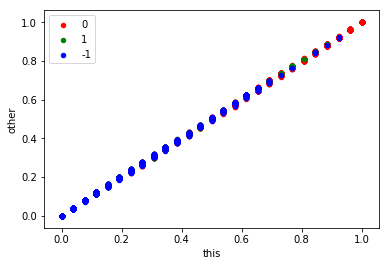

In [24]:
density_raw.plotMarginalComparisons(density_generated)

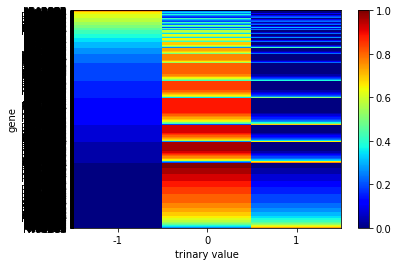

['Rv3128c',
 'Rv3269',
 'Rvnt38',
 'Rv0440',
 'Rv2032',
 'Rv2734',
 'Rv3129',
 'Rv3417c',
 'Rvnt15',
 'Rv1502',
 'Rv2005c',
 'Rv2735c',
 'Rv0531',
 'Rv0572c',
 'Rv3048c',
 'Rv3133c',
 'Rv3270',
 'Rvnt31',
 'Rv2006',
 'Rv2033c',
 'Rv2628',
 'Rv3132c',
 'Rv3134c',
 'Rv3846',
 'Rv3847',
 'Rvnt09',
 'Rv0451c',
 'Rv0519c',
 'Rv0833',
 'Rv0847',
 'Rv0991c',
 'Rv1994c',
 'Rv1998c',
 'Rv2122c',
 'Rv2629',
 'Rv3508',
 'Rv3587c',
 'Rvnt37',
 'Rv2526',
 'Rv2737c',
 'Rv0341',
 'Rv0834c',
 'Rv1993c',
 'Rv2016',
 'Rv2035',
 'Rv2329c',
 'Rv2630',
 'Rv3891c',
 'Rv0061c',
 'Rv0279c',
 'Rv0569',
 'Rv0829',
 'Rv0872c',
 'Rv0885',
 'Rv1812c',
 'Rv1861',
 'Rv2428',
 'Rv2491',
 'Rv2748c',
 'Rv2809',
 'Rvnt04',
 'Rvnt30',
 'Rvnt42',
 'Rv0193c',
 'Rv0925c',
 'Rv0988',
 'Rv1252c',
 'Rv1490',
 'Rv1653',
 'Rv1657',
 'Rv2153c',
 'Rv2338c',
 'Rv2658c',
 'Rv2721c',
 'Rv3047c',
 'Rv3507',
 'Rv3514',
 'Rv0186',
 'Rv0297',
 'Rv0342',
 'Rv0403c',
 'Rv0747',
 'Rv0848',
 'Rv0996',
 'Rv1087',
 'Rv1091',
 'Rv1258c',
 'Rv13

In [26]:
_ = density_raw.plotMarginals(xlabel="trinary value", ylabel="gene")

## Reproduce the original covariance structure

## Maintain marginals with random replacement, but eliminate covariances.